# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>
* Notebook completed by Adam Lang
* Date: 3/26/2024

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Ski data](#3.4.1_Ski_data)
    * [3.4.2 State-wide summary data](#3.4.2_State-wide_summary_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top States By Order Of Each Of The Summary Statistics](#3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
      * [3.5.1.1 Total state area](#3.5.1.1_Total_state_area)
      * [3.5.1.2 Total state population](#3.5.1.2_Total_state_population)
      * [3.5.1.3 Resorts per state](#3.5.1.3_Resorts_per_state)
      * [3.5.1.4 Total skiable area](#3.5.1.4_Total_skiable_area)
      * [3.5.1.5 Total night skiing area](#3.5.1.5_Total_night_skiing_area)
      * [3.5.1.6 Total days open](#3.5.1.6_Total_days_open)
    * [3.5.2 Resort density](#3.5.2_Resort_density)
      * [3.5.2.1 Top states by resort density](#3.5.2.1_Top_states_by_resort_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average ticket price by state](#3.5.3.3_Average_ticket_price_by_state)
      * [3.5.3.4 Adding average ticket price to scatter plot](#3.5.3.4_Adding_average_ticket_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Ski Resort Numeric Data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against ticket price](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point, you should have a firm idea of what your data science problem is and have the data you believe could help solve it. The business problem was a general one of modeling resort revenue. The data you started with contained some ticket price values, but with a number of missing values that led to several rows being dropped completely. You also had two kinds of ticket price. There were also some obvious issues with some of the other features in the data that, for example, led to one column being completely dropped, a data error corrected, and some other rows dropped. You also obtained some additional US state population and size data with which to augment the dataset, which also required some cleaning.

The data science problem you subsequently identified is to **predict the adult weekend ticket price for ski resorts.**

## 3.3 Imports<a id='3.3_Imports'></a>

In [60]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#from library.sb_utils import save_file - I am using google colab so I am not going to use this function

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>
* We will be loading the `ski_data_cleaned.csv` file produced from the previous notebook.

### 3.4.1 Ski data<a id='3.4.1_Ski_data'></a>

In [61]:
# I am using google colab so I need to mount my drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# load file with pd.read_csv
ski_data = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Big_Mountain_Case_Study/ski_data_cleaned.csv')

In [63]:
# view ski_data_cleaned dataframe info
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

Observation:
* We can see a result of the data cleaning process was condensing the dataset down to 277 rows and 25 columns.
* We can also see the target variable `AdultWeekend` which is now the focus of this data science project which is to predict weekend lift ticket prices.

In [64]:
# view head of ski_data_cleaned
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


Observations:
* There are still missing values or `NaN` noted in the `NightSkiing_ac` column. However, we know from the previous notebook this is not the only column that still has missing values.
* The numeric data types are also mostly floats. This is great for most of the variables but for a variable such as `TerrainParks` this may not be feasible as you really can't have "half a terrain park" so we may want to consider changing this to an integer.

### 3.4.2 State-wide summary data<a id='3.4.2_State-wide_summary_data'></a>
* Load the `state_summary.csv` file produced from the previous notebook.

In [65]:
# load state_summary.csv file
state_summary = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Big_Mountain_Case_Study/state_summary.csv')

In [66]:
# view state_summary dataframe info
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        35 non-null     object 
 1   resorts_per_state            35 non-null     int64  
 2   state_total_skiable_area_ac  35 non-null     float64
 3   state_total_days_open        35 non-null     float64
 4   state_total_terrain_parks    35 non-null     float64
 5   state_total_nightskiing_ac   35 non-null     float64
 6   state_population             35 non-null     int64  
 7   state_area_sq_miles          35 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.3+ KB


Observations:
* 35 rows and 8 columns.
* 1 `object` data type for the `state` column variable.
* Mixed numeric data types for the other 7 variables: `float64` and `int64`.
* There does not appear to be any null values, however we should still consider that there may be missing values.

In [67]:
# view state_summary head of dataframe
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,68682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


Observations:
* As mentioned in the previous `.info()` output we have 3 main data types: `object`, `float64` and `int64`.

## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Top States By Order Of Each Of The Summary Statistics<a id='3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics'></a>

What does the state-wide picture for your market look like?
* Remember our ski resort **Big Mountain** is located in Montana, so we will definitely want to take a look at the state of Montana and other states in the Rocky Mountain region.

In [68]:
# set the index on the 'state' column
state_summary_newind = state_summary.set_index('state')

#### 3.5.1.1 Total state area<a id='3.5.1.1_Total_state_area'></a>
* Sort data based on variable `state_area_sq_miles` - total square miles per state.

In [69]:
# sort_values for state_area_sq_miles in descending order on the state index - view head of dataframe
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head()

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Name: state_area_sq_miles, dtype: int64

Observations:
* No surprise that Alaska has the most total square miles of any state.
* Big Mountain Resorts home state of **Montana**, comes in at third largest in total square miles.

#### 3.5.1.2 Total state population<a id='3.5.1.2_Total_state_population'></a>
* Sort data based on `state_population` - total population by state.

In [70]:
# sort_values for state_population in descending order on state index - view head of dataframe
state_summary_newind.state_population.sort_values(ascending=False).head()

state
California      39512223
New York        19453561
Pennsylvania    12801989
Illinois        12671821
Ohio            11689100
Name: state_population, dtype: int64

Observations:
* California dominates the state population figures despite coming in second behind Alaska in size (by a long way).
* Big Mountain resort's state of Montana was in the top five for size, but doesn't figure in the most populous states. Thus Montana is less densely populated.

#### 3.5.1.3 Resorts per state<a id='3.5.1.3_Resorts_per_state'></a>
* Sort data based on `resorts_per_state` - total number of resorts per state.

In [71]:
# sort_values for resorts_per_state in descending order -view head of dataframe
state_summary_newind.resorts_per_state.sort_values(ascending=False).head()

state
New York        33
Michigan        28
Colorado        22
California      21
Pennsylvania    19
Name: resorts_per_state, dtype: int64

Observations:
* New York comes top in the number of resorts in our market. Is this because of its proximity to wealthy New Yorkers wanting a convenient skiing trip? Or is it simply that its northerly location means there are plenty of good locations for resorts in that state?

#### 3.5.1.4 Total skiable area<a id='3.5.1.4_Total_skiable_area'></a>
* Sort data based on `total_skiable_area` - total skiable land area per state.

In [72]:
# sort_values for total_skiable_area in descending order
state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).head()

state
Colorado      68682.0
Utah          30508.0
California    25948.0
Montana       21410.0
Idaho         16396.0
Name: state_total_skiable_area_ac, dtype: float64

Observations:
* New York state may have the most resorts, but they don't account for the most skiing area.
* In fact, New York doesn't even make it into the top five of skiable area.
* Good old Montana makes it into the top five, though. You may start to think that New York has more, smaller resorts, whereas Montana has fewer, larger resorts.
* Colorado seems to have a name for skiing; it's in the top five for resorts and in top place for total skiable area.

#### 3.5.1.5 Total night skiing area<a id='3.5.1.5_Total_night_skiing_area'></a>
* Sort data based on `total_nightskiing_ac` - total night skiing acreage by state.

In [73]:
# sort_values for total_nightskiing_ac in descending order
state_summary_newind.state_total_nightskiing_ac.sort_values(ascending=False).head()

state
New York        2836.0
Washington      1997.0
Michigan        1946.0
Pennsylvania    1528.0
Oregon          1127.0
Name: state_total_nightskiing_ac, dtype: float64

Observations:
* New York dominates the area of skiing available at night.
* Looking at the top five in general, they are all the more northerly states. Is night skiing in and of itself an appeal to customers, or is a consequence of simply trying to extend the skiing day where days are shorter? Is New York's domination here because it's trying to maximize its appeal to visitors who'd travel a shorter distance for a shorter visit? You'll find the data generates more (good) questions rather than answering them. This is a positive sign!
* You might ask your executive sponsor or data provider for some additional data about typical length of stays at these resorts, although you might end up with data that is very granular and most likely proprietary to each resort. A useful level of granularity might be "number of day tickets" and "number of weekly passes" sold.

#### 3.5.1.6 Total days open<a id='3.5.1.6_Total_days_open'></a>
* Sort data based on `state_total_days_open` - total days resorts are open per year by state.

In [74]:
# sort_values by state_total_days_open in descending order - I moved the head return value to 10 as I wanted to see where Vermont ranks
state_summary_newind.state_total_days_open.sort_values(ascending=False).head(10)

state
Colorado         3258.0
California       2738.0
Michigan         2389.0
New York         2384.0
New Hampshire    1847.0
Vermont          1777.0
Utah             1544.0
Wisconsin        1519.0
Minnesota        1490.0
Pennsylvania     1404.0
Name: state_total_days_open, dtype: float64

Observations:
* The total days open seem to bear some resemblance to the number of resorts. This is plausible. The season will only be so long, and so the more resorts open through the skiing season, the more total days open we'll see.
* New Hampshire makes a good effort at making it into the top five, for a small state that didn't make it into the top five of resorts per state. Does its location mean resorts there have a longer season and so stay open longer, despite there being fewer of them?
* A personal observation based on my knowledge of the skiing industry:
    * I am surprised that New Hampshire is ranked ahead of Vermont here. Vermont has the resort "Killington" which is known for "the longest season in the east" sometimes staying open until June. Although Killington resort may be a true outlier for the total distribution of days open for all Vermont resorts and thus New Hampshire is head.
    * I also know from personal knowledge that New Hampshire is home to Mount Washington which is a 6,288 foot mountain, the highest peak in the east. While this is not a ski resort, it is known for "the worst weather in the world" and multiple jet streams run through here. Therefore the ski resorts that surround the mountain often get snow by default as it often snows year round on Mount Washington.

### 3.5.2 Resort density<a id='3.5.2_Resort_density'></a>

There are big states which are not necessarily the most populous. There are states that host many resorts, but other states host a larger total skiing area. The states with the most total days skiing per season are not necessarily those with the most resorts. And New York State boasts an especially large night skiing area. New York had the most resorts but wasn't in the top five largest states, so the reason for it having the most resorts can't be simply having lots of space for them. New York has the second largest population behind California. Perhaps many resorts have sprung up in New York because of the population size? Does this mean there is a high competition between resorts in New York State, fighting for customers and thus keeping prices down? You're not concerned, per se, with the absolute size or population of a state, but you could be interested in the ratio of resorts serving a given population or a given area.

So, calculate those ratios! Think of them as measures of resort density, and drop the absolute population and state size columns.

In [75]:
# The 100_000 scaling is simply based on eyeballing the magnitudes of the data
# calculating resorts per capita for population and square mileage
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state / state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,68682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


With the removal of the two columns that only spoke to state-specific data, you now have a Dataframe that speaks to the skiing competitive landscape of each state. It has the number of resorts per state, total skiable area, and days of skiing. You've translated the plain state data into something more useful that gives you an idea of the density of resorts relative to the state population and size.

How do the distributions of these two new features look?

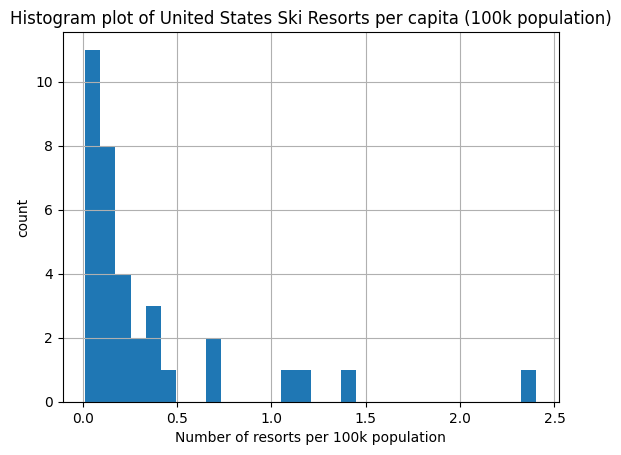

In [76]:
# histogram plot of the resorts per capita
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.title("Histogram plot of United States Ski Resorts per capita (100k population)")
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

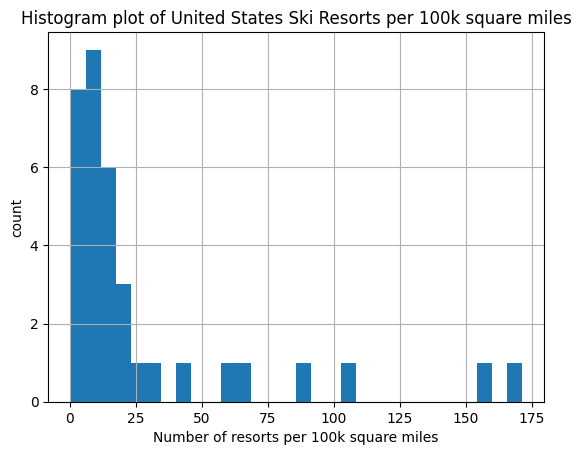

In [77]:
# histogram plot of resorts per 100k square miles
state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.title("Histogram plot of United States Ski Resorts per 100k square miles")
plt.xlabel('Number of resorts per 100k square miles')
plt.ylabel('count');

Observations of both plots above:
* Both plots seem to be right skewed and they have quite some long tails on them, but there's definitely some structure there.
* Both plots show outliers with the Resorst per 100k square miles showing a few more outliers than the plot per capita or population.

#### 3.5.2.1 Top states by resort density<a id='3.5.2.1_Top_states_by_resort_density'></a>
* Sort data based on `resorts_per_100kcapita`

In [78]:
# sort_values of resorts per capita descending
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head(10)

state
Vermont          2.403889
Wyoming          1.382268
New Hampshire    1.176721
Montana          1.122778
Idaho            0.671492
Maine            0.669537
New Mexico       0.429220
Alaska           0.410091
Utah             0.405495
Colorado         0.382028
Name: resorts_per_100kcapita, dtype: float64

Observations:
* Vermont has the most resports per 100k capita population. We also have to remember that the poplation of Vermont is ~645,000 people with most people settled around the city of Burlington in the north. The entire state is also encompassed by the Green Mountains which run from the southern border all the way to Canada and there are ski resorts scattered throughout the entire state. So it makes sense that Vermont with a smaller population has the highest ratio of ski resports per 100k people.
* Montana the state where Big Mountain Resort is located is ranked 4th here.

In [79]:
# sort_values based on resorts_per_100ksq_mile descending
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head(10)

state
New Hampshire    171.141299
Vermont          155.990017
Massachusetts    104.225886
Connecticut       90.203861
Rhode Island      64.724919
New York          60.489414
Pennsylvania      41.255917
Michigan          28.951341
Maine             25.438101
New Jersey        22.927892
Name: resorts_per_100ksq_mile, dtype: float64

Observations:
* Vermont seems particularly high in terms of resorts per capita, and both New Hampshire and Vermont top the chart for resorts per area. New York doesn't appear in either!
* As I mentioned in my observations above, it again makes sense why Vermont is in the top 2 for number of resorts per square mile and based on 100k population.
* Another thing worth noting here is that the top 5 states represent 5 of the 6 states of the New England Region. These states all have lower square mileage than the western states like Colorado or Montana so it makes sense that they are the top 5 in terms of number of resorts per 100k square miles.
* Another observation? I printed the top 10 of the data above and we can see 9 of the 10 are in the northeast with 1 state (Michigan) being the most eastern of the midwest.
* A final observation regarding the square mileage findings is that the top 10 are all densely populated states so the number of resorts per square mile would likely be located closer together than western resorts.

### 3.5.3 Visualizing High Dimensional Data<a id='3.5.3_Visualizing_High_Dimensional_Data'></a>

You may be starting to feel there's a bit of a problem here, or at least a challenge. You've constructed some potentially useful and business relevant features, derived from summary statistics, for each of the states you're concerned with. You've explored many of these features in turn and found various trends. Some states are higher in some but not in others. Some features will also be more correlated with one another than others.

One way to disentangle this interconnected web of relationships is via [principle components analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. You can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. You can also explore how the original features contribute to these derived features.

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

#### 3.5.3.1 Scale the data<a id='3.5.3.1_Scale_the_data'></a>
* PCA step 1: scale data

You only want numeric data here, although you don't want to lose track of the state labels, so it's convenient to set the state as the index.

In [80]:
#Code task 1#
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
state_summary_scale = state_summary.set_index('state')
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index
#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
#view output
state_summary_scale.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
Colorado,22,68682.0,3258.0,74.0,428.0,0.382028,21.134744
Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


Observations:
* The above shows what we expect: the columns we want are all numeric and the state has been moved to the index.
* Although, it's not necessary to step through the sequence so laboriously, it is often good practice even for experienced professionals. It's easy to make a mistake or forget a step, or the data may have been holding out a surprise! Stepping through like this helps  validate both your work and the data!

* Now use `scale()` to scale the data. This is from `sklearn.preprocessing.scale`.

In [81]:
# scaling the data with the scale() function from sklearn.preprocessing
state_summary_scale = scale(state_summary_scale)

Note, `scale()` returns an ndarray, so you lose the column names. Because you want to visualize scaled data, you already copied the column names. Now you can construct a dataframe from the ndarray here and reintroduce the column names.

In [82]:
#Code task 2#
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
#view output
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.354356,-0.689059,-0.816118,0.069410,0.139593,-0.689999
1,-0.933558,-0.408182,-0.819038,-0.726994,-0.701326,-0.644706,-0.658125
2,1.472706,1.457796,2.190933,2.615141,0.080201,-0.592085,-0.387368
3,1.599351,4.729745,2.816757,2.303209,-0.164893,0.082069,-0.184291
4,-0.553622,-0.501515,-0.679431,-0.548747,-0.430027,-0.413557,1.504408


##### 3.5.3.1.1 Verifying the scaling<a id='3.5.3.1.1_Verifying_the_scaling'></a>

This is definitely going the extra mile for validating your steps, but provides a worthwhile lesson.

First of all, check the mean of the scaled features using panda's `mean()` DataFrame method.

In [83]:
#Code task 3#
#Call `state_summary_scaled_df`'s `mean()` method
state_summary_scaled_df.mean()

resorts_per_state             -7.295751e-17
state_total_skiable_area_ac    1.794200e-17
state_total_days_open          7.692260e-17
state_total_terrain_parks      4.599495e-17
state_total_nightskiing_ac     7.612958e-17
resorts_per_100kcapita         5.075305e-17
resorts_per_100ksq_mile        5.075305e-17
dtype: float64

This is pretty much zero!

Perform a similar check for the standard deviation using pandas's `std()` DataFrame method.

In [84]:
#Code task 4#
#Call `state_summary_scaled_df`'s `std()` method
state_summary_scaled_df.std()

resorts_per_state              1.014599
state_total_skiable_area_ac    1.014599
state_total_days_open          1.014599
state_total_terrain_parks      1.014599
state_total_nightskiing_ac     1.014599
resorts_per_100kcapita         1.014599
resorts_per_100ksq_mile        1.014599
dtype: float64

Well, this is a little embarrassing. The numbers should be closer to 1 than this! Check the documentation for [scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) to see if you used it right. What about [std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html), did you mess up there? Is one of them not working right?

The keen observer, who already has some familiarity with statistical inference and biased estimators, may have noticed what's happened here. `scale()` uses the biased estimator for standard deviation (ddof=0). This doesn't mean it's bad! It simply means it calculates the standard deviation of the sample it was given. The `std()` method, on the other hand, defaults to using ddof=1, that is it's normalized by N-1. In other words, the `std()` method default is to assume you want your best estimate of the population parameter based on the given sample. You can tell it to return the biased estimate instead:

In [85]:
#Code task 5#
#Repeat the previous call to `std()` but pass in ddof=0
state_summary_scaled_df.std(ddof=0)

resorts_per_state              1.0
state_total_skiable_area_ac    1.0
state_total_days_open          1.0
state_total_terrain_parks      1.0
state_total_nightskiing_ac     1.0
resorts_per_100kcapita         1.0
resorts_per_100ksq_mile        1.0
dtype: float64

There! Now it agrees with `scale()` and our expectation. This just goes to show different routines to do ostensibly the same thing can have different behaviours. Good practice is to keep validating your work and checking the documentation!

#### 3.5.3.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

* PCA step 2: Fit the PCA transformation using the scaled data.

In [86]:
# Fit PCA transformation using scaled data
state_pca = PCA().fit(state_summary_scale)

Plot the cumulative variance ratio with number of components.

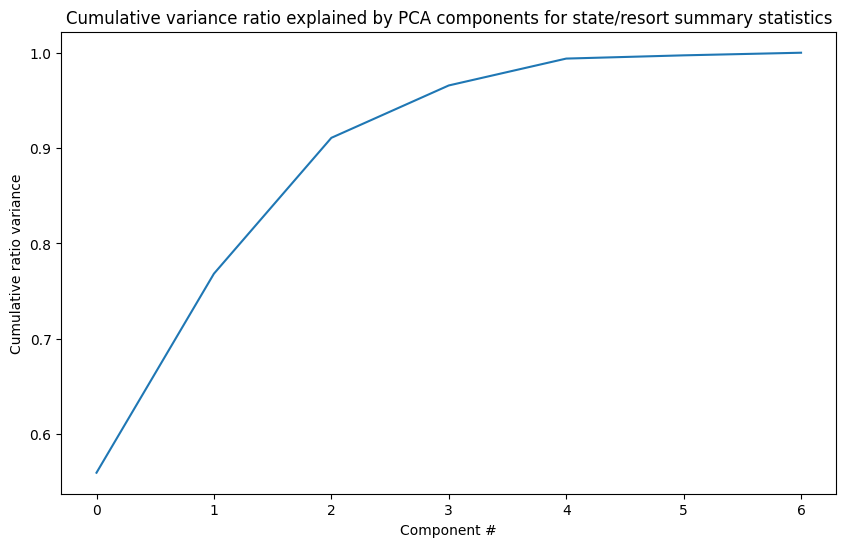

In [87]:
#Code task 6#
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

Observations:
* The first two components seem to account for over 75% of the variance, and the first four for over 95%.

**Note:** It is important to move quickly when performing exploratory data analysis. You should not spend hours trying to create publication-ready figures. However, it is crucially important that you can easily review and summarise the findings from EDA. Descriptive axis labels and titles are _extremely_ useful here. When you come to reread your notebook to summarise your findings, you will be thankful that you created descriptive plots and even made key observations in adjacent markdown cells.

PCA Step 3: Apply the transformation to the data to obtain the derived features.

In [88]:
#Code task 7#
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
state_pca_x = state_pca.transform(state_summary_scale)

In [89]:
# view shape of PCA step 3 transformation
state_pca_x.shape

(35, 7)

PCA Step 4: Plot the first two derived features (the first two principle components) and label each point with the name of the state.

Take a moment to familiarize yourself with the code below. It will extract the first and second columns from the transformed data (`state_pca_x`) as x and y coordinates for plotting. Recall the state labels you saved (for this purpose) for subsequent calls to `plt.annotate`. Grab the second (index 1) value of the cumulative variance ratio to include in your descriptive title; this helpfully highlights the percentage variance explained
by the two PCA components you're visualizing. Then create an appropriately sized and well-labelled scatterplot
to convey all of this information.

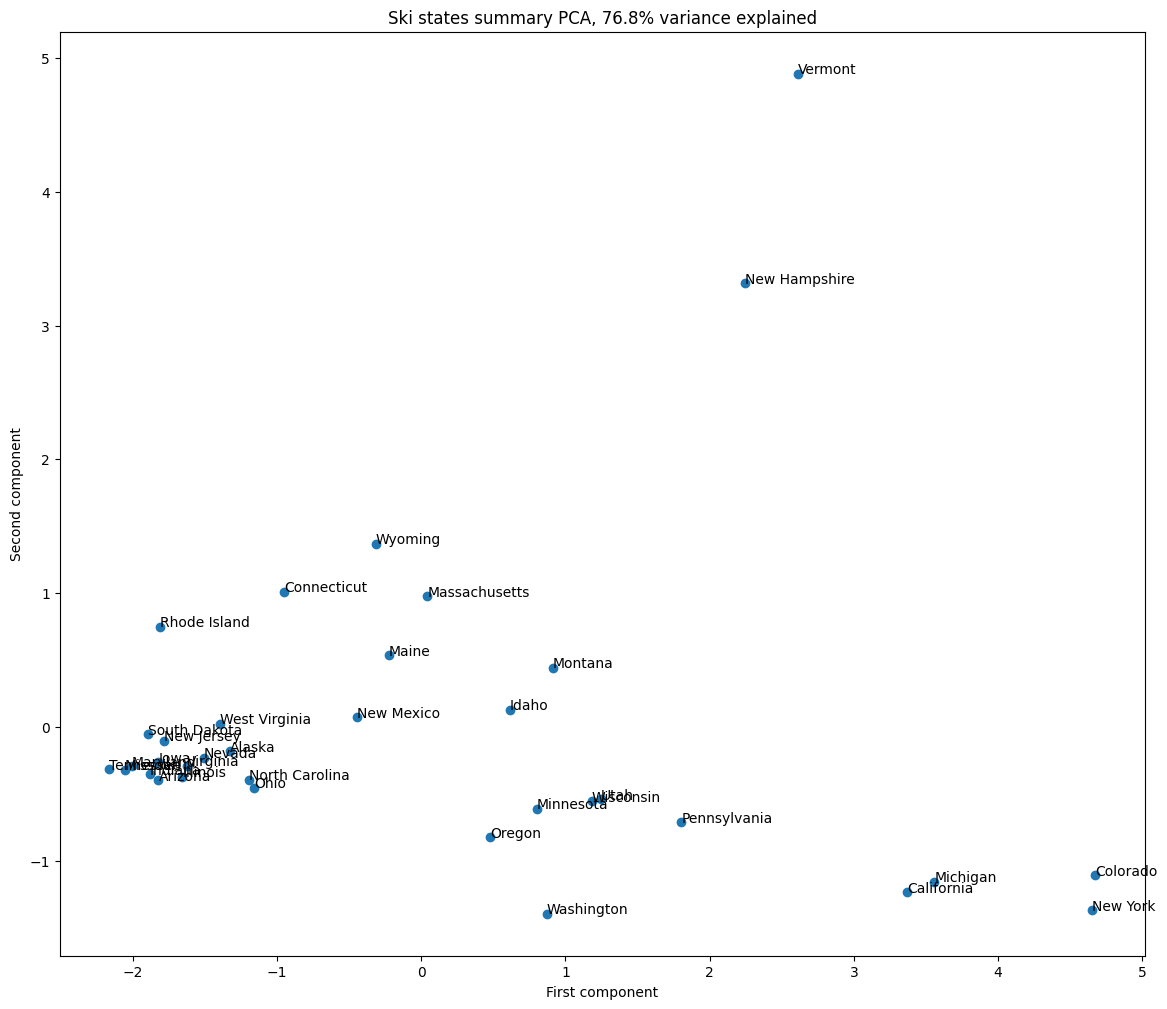

In [90]:
# Plotting the first 2 derived features

## extracts 1st and 2nd columns from transformed data as x and y coordinates
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
## set index
state = state_summary_index
## Using second value (index 1) of cumulative var ratio
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
## Set up plot features
plt.subplots(figsize=(14,12)) #original figsize was 10,8
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

Observations of the plot above:
* We can see after plotting the first 2 PCA components, that the state we are interested in for our resort 'Big Mountain' seems to fit into a PCA cluster nearest to Idaho which makes sense since it borders the state.
* We can also begin to see some outlier states in the data: California, Michigan, Colorado, New York, Vermont and New Hampshire.

#### 3.5.3.3 Average ticket price by state<a id='3.5.3.3_Average_ticket_price_by_state'></a>

Here, all point markers for the states are the same size and colour. You've visualized relationships between the states based on features such as the total skiable terrain area, but your ultimate interest lies in ticket prices. You know ticket prices for resorts in each state, so it might be interesting to see if there's any pattern there.

In [91]:
#Code task 8#
#Calculate the average 'AdultWeekend' ticket price by state
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head(20).sort_values(ascending=False)

state
Colorado         90.714286
Arizona          83.500000
California       81.416667
Nevada           81.000000
New Jersey       79.990000
Maryland         79.000000
New Hampshire    76.500000
New Mexico       65.666667
Maine            61.000000
Alaska           57.333333
Massachusetts    57.200000
Connecticut      56.800000
Idaho            55.900000
Michigan         52.400000
Montana          51.909091
Minnesota        49.667143
Indiana          48.500000
Missouri         48.000000
Illinois         43.333333
Iowa             41.666667
Name: AdultWeekend, dtype: float64

Observation of output:
* Colorado has the highest average ticket price.
* Montana the state where Big Mountain is located is not in the top 10 most expensive, it is actually ranked 15th overall.

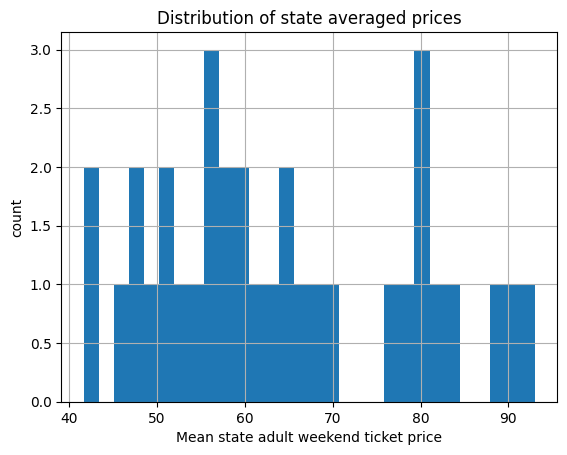

In [92]:
# Create a histogram plot of the average ticket price by state
state_avg_price.hist(bins=30)
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count');

Observations on the plot above:
* There appears to be 2 outlier groups, one group averages between 75 and 85, and the other around 90. We know from the output above the plot that Colorado is the only state that averages in the 90s.
* We can see for the most part the majority of the ski resorts average prices are between 45 and 70 dollars. Based on the top 20 prices we printed above the plot, we know Montana (home of Big Mountain Resort) lies within the lower part of the largest bin at 51.9.

#### 3.5.3.4 Adding average ticket price to scatter plot<a id='3.5.3.4_Adding_average_ticket_price_to_scatter_plot'></a>

At this point you have several objects floating around. You have just calculated average ticket price by state from our ski resort data, but you've been looking at principle components generated from other state summary data. We extracted indexes and column names from a dataframe and the first two principle components from an array. It's becoming a bit hard to keep track of them all. You'll create a new DataFrame to do this.

In [93]:
#Code task 9#
#Create a dataframe containing the values of the first two PCA components
#Remember the first component was given by state_pca_x[:, 0],
#and the second by state_pca_x[:, 1]
#Call these 'PC1' and 'PC2', respectively and set the dataframe index to `state_summary_index`
pca_df = pd.DataFrame({'PC1': state_pca_x[:, 0], 'PC2': state_pca_x[:, 1]}, index=state_summary_index)
pca_df.head()

,PC1,PC2
state,,
Alaska,-1.328983,-0.179403
Arizona,-1.823177,-0.395812
California,3.372096,-1.236123
Colorado,4.676187,-1.105520
Connecticut,-0.954130,1.010874


That worked, and you have state as an index.

In [94]:
# our average state prices also have state as an index
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

In [95]:
# we can also cast it to a dataframe using Series' to_frame() method:
state_avg_price.to_frame().head()

,AdultWeekend
state,
Alaska,57.333333
Arizona,83.500000
California,81.416667
Colorado,90.714286
Connecticut,56.800000


Now you can concatenate both parts on axis 1 and using the indexes.

In [96]:
#Code task 10#
#Use pd.concat to concatenate `pca_df` and `state_avg_price` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.328983,-0.179403,57.333333
Arizona,-1.823177,-0.395812,83.500000
California,3.372096,-1.236123,81.416667
Colorado,4.676187,-1.105520,90.714286
Connecticut,-0.954130,1.010874,56.800000


You saw some range in average ticket price histogram above, but it may be hard to pick out differences if you're thinking of using the value for point size. You'll add another column where you seperate these prices into quartiles; that might show something.

In [97]:
# add a 'Quartile` column to this dataframe using pd.qcut function - 'q' is the number of quantiles,
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision=1)
pca_df.head()

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.328983,-0.179403,57.333333,"(53.1, 60.4]"
Arizona,-1.823177,-0.395812,83.500000,"(78.4, 93.0]"
California,3.372096,-1.236123,81.416667,"(78.4, 93.0]"
Colorado,4.676187,-1.105520,90.714286,"(78.4, 93.0]"
Connecticut,-0.954130,1.010874,56.800000,"(53.1, 60.4]"


In [98]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

PC1              float64
PC2              float64
AdultWeekend     float64
Quartile        category
dtype: object

This looks great. But, let's have a healthy paranoia about it. You've just created a whole new DataFrame by combining information. Do we have any missing values? It's a narrow DataFrame, only four columns, so you'll just print out any rows that have any null values, expecting an empty DataFrame.

In [99]:
# check for missing values
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Rhode Island,-1.811375,0.749156,NaN,NaN



Ah, Rhode Island. How has this happened? Recall you created the original ski resort state summary dataset in the previous step before removing resorts with missing prices. This made sense because you wanted to capture all the other available information. However, Rhode Island only had one resort and its price was missing. You have two choices here. If you're interested in looking for any pattern with price, drop this row. But you are also generally interested in any clusters or trends, then you'd like to see Rhode Island even if the ticket price is unknown. So, replace these missing values to make it easier to handle/display them.

Because `Quartile` is a category type, there's an extra step here. Add the category (the string 'NA') that you're going to use as a replacement.

In [100]:
# fillna missing values for Rhode Island with the mean for AdultWeekend prices
# add a category to 'Quartile' for 'NA' - then fillna with 'NA'
# then .loc to index Rhode Island to see result
pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace=True)
pca_df.loc['Rhode Island']

PC1             -1.811375
PC2              0.749156
AdultWeekend    64.124388
Quartile               NA
Name: Rhode Island, dtype: object

Note, in the above Quartile has the string value 'NA' that you inserted. This is different to `numpy`'s NaN type.

You now have enough information to recreate the scatterplot, now adding marker size for ticket price and colour for the discrete quartile.

Notice in the code below how you're iterating over each quartile and plotting the points in the same quartile group as one. This gives a list of quartiles for an informative legend with points coloured by quartile and sized by ticket price (higher prices are represented by larger point markers).

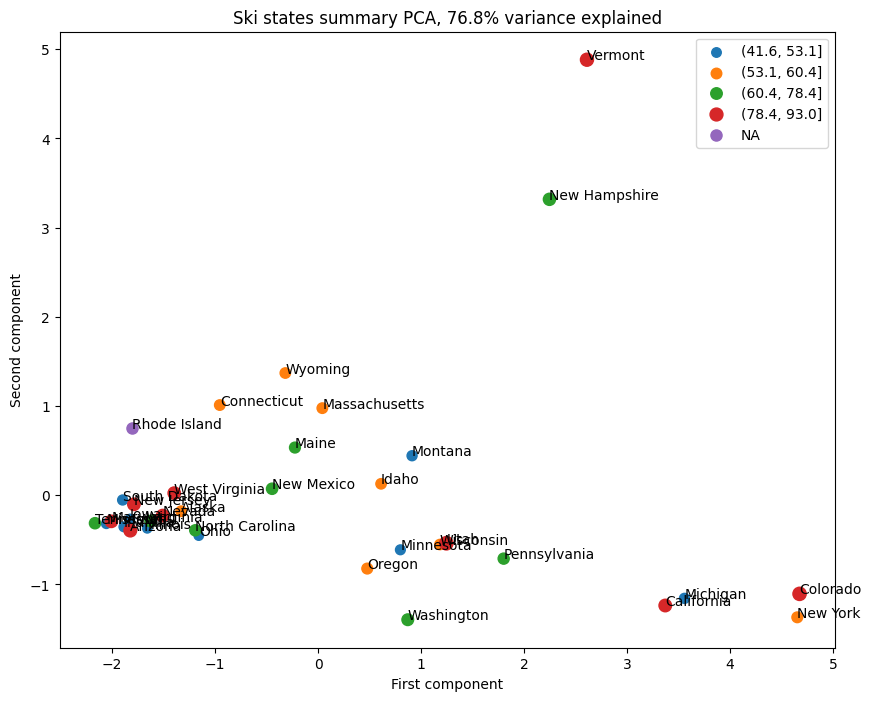

In [101]:
# Creating a scatter plot

# x and y are PCA1 and PCA2
x = pca_df.PC1
y = pca_df.PC2
# price is the target variable AdultWeekend
price = pca_df.AdultWeekend
# Set quartiles to the quartiles from pca_df
quartiles = pca_df.Quartile
# index on states from the pca_df
state = pca_df.index
# calculate PCA variance and cumsum()
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
# set up plot details
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

Observations on the scatterplot above:
* Now, you see the same distribution of states as before, but with additional information about the average price. There isn't an obvious pattern. The red points representing the upper quartile of price can be seen to the left, the right, and up top. There's also a spread of the other quartiles as well. In this representation of the ski summaries for each state, which accounts for some 77% of the variance, you simply do not seeing a pattern with price.
* The plot we looked at previous to this did not include the average prices per state. Montana the state where Big Mountain Ski Resort is located is still located near Idaho in terms of the first two PCA components, but we can see the average price is actually in the same bin as states such as Minnesota and Michigan.

The above scatterplot was created using matplotlib. This is powerful, but took quite a bit of effort to set up. You have to iterate over the categories, plotting each separately, to get a colour legend. You can also tell that the points in the legend have different sizes as well as colours. As it happens, the size and the colour will be a 1:1 mapping here, so it happily works for us here. If we were using size and colour to display fundamentally different aesthetics, you'd have a lot more work to do. So matplotlib is powerful, but not ideally suited to when we want to visually explore multiple features as here (and intelligent use of colour, point size, and even shape can be incredibly useful for EDA).

Fortunately, there's another option: seaborn. You saw seaborn in action in the previous notebook, when you wanted to distinguish between weekend and weekday ticket prices in the boxplot. After melting the dataframe to have ticket price as a single column with the ticket type represented in a new column, you asked seaborn to create separate boxes for each type.

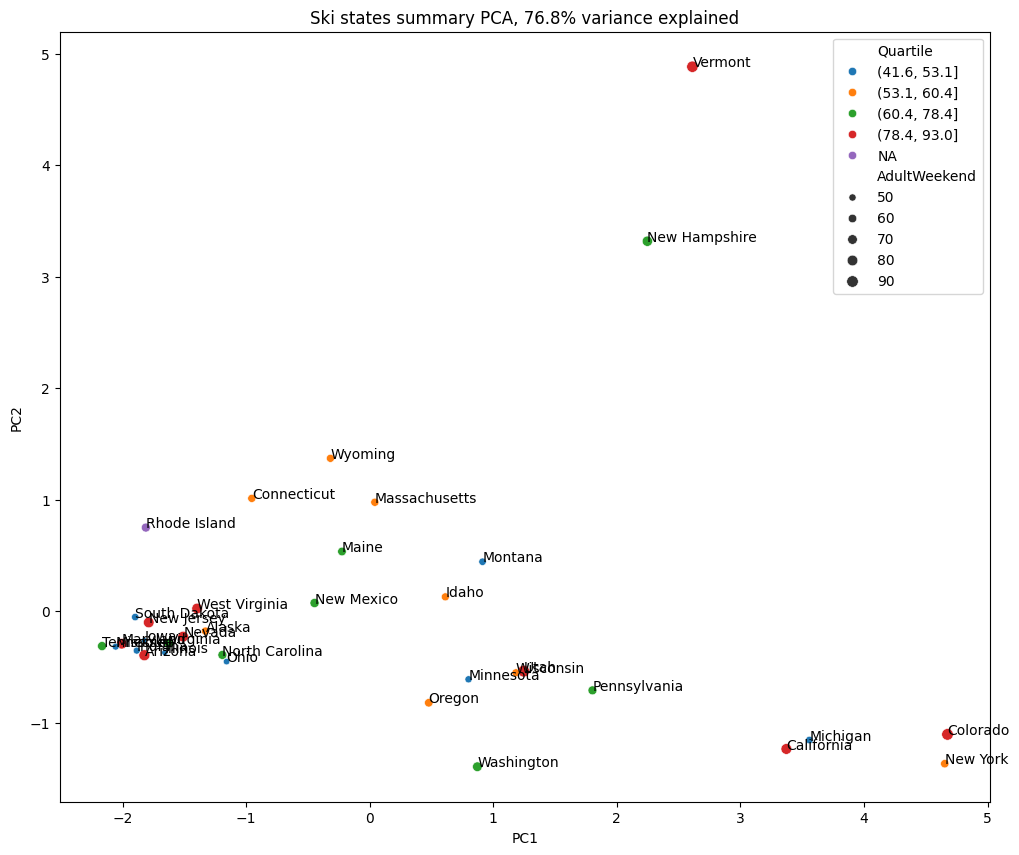

In [102]:
#Code task 11#
#Create a seaborn scatterplot by calling `sns.scatterplot`
#Specify the dataframe pca_df as the source of the data,
#specify 'PC1' for x and 'PC2' for y,
#specify 'AdultWeekend' for the pointsize (scatterplot's `size` argument),
#specify 'Quartile' for `hue`
#specify pca_df.Quartile.cat.categories for `hue_order` - what happens with/without this?
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x='PC1', y='PC2', size='AdultWeekend', hue='Quartile',
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained');

Seaborn does more! You should always care about your output. What if you want the ordering of the colours in the legend to align intuitively with the ordering of the quartiles? Add a `hue_order` argument! Seaborn has thrown in a few nice other things:

* the aesthetics are separated in the legend
* it defaults to marker sizes that provide more contrast (smaller to larger)
* when starting with a DataFrame, you have less work to do to visualize patterns in the data

The last point is important. Less work means less chance of mixing up objects and jumping to erroneous conclusions. This also emphasizes the importance of getting data into a suitable DataFrame. In the previous notebook, you `melt`ed the data to make it longer, but with fewer columns, in order to get a single column of price with a new column representing a categorical feature you'd want to use. A **key skill** is being able to wrangle data into a form most suited to the particular use case.

Having gained a good visualization of the state summary data, you can discuss and follow up on your findings.

In the first two components, there is a spread of states across the first component. It looks like Vermont and New Hampshire might be off on their own a little in the second dimension, although they're really no more extreme than New York and Colorado are in the first dimension. But if you were curious, could you get an idea what it is that pushes Vermont and New Hampshire up?

The `components_` attribute of the fitted PCA object tell us how important (and in what direction) each feature contributes to each score (or coordinate on the plot). **NB we were sensible and scaled our original features (to zero mean and unit variance)**. You may not always be interested in interpreting the coefficients of the PCA transformation in this way, although it's more likely you will when using PCA for EDA as opposed to a preprocessing step as part of a machine learning pipeline. The attribute is actually a numpy ndarray, and so has been stripped of helpful index and column names. Fortunately, you thought ahead and saved these. This is how we were able to annotate the scatter plots above. It also means you can construct a DataFrame of `components_` with the feature names for context:

In [103]:
# construct a dataframe of `components_` with feature names for context
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.487980,0.306989,0.492918,0.491122,0.333328,0.184745,0.195514
1,-0.083478,-0.153921,-0.048543,-0.043780,-0.342000,0.665016,0.637069
2,-0.177190,0.726514,0.127770,0.016729,-0.538762,0.182903,-0.316953
3,0.066653,-0.163936,-0.092896,-0.111295,0.320874,0.696165,-0.600050
4,-0.199711,0.547323,-0.247802,-0.422766,0.567769,0.051840,0.308816
5,-0.811077,-0.080072,0.183553,0.493476,0.236619,0.050330,-0.003239
6,-0.146075,-0.146269,0.796633,-0.567421,0.018832,-0.017415,-0.004485


For the row associated with the second component, are there any large values?

It looks like `resorts_per_100kcapita` and `resorts_per_100ksq_mile` might count for quite a lot, in a positive sense. Be aware that sign matters; a large negative coefficient multiplying a large negative feature will actually produce a large positive PCA score.

In [104]:
# filter for NH and VT
state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
state,New Hampshire,Vermont
resorts_per_state,16,15
state_total_skiable_area_ac,3427.0,7239.0
state_total_days_open,1847.0,1777.0
state_total_terrain_parks,43.0,50.0
state_total_nightskiing_ac,376.0,50.0
resorts_per_100kcapita,1.176721,2.403889
resorts_per_100ksq_mile,171.141299,155.990017


In [105]:
# filter for NH and VT
state_summary_scaled_df[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
resorts_per_state,0.839478,0.712833
state_total_skiable_area_ac,-0.266535,0.025332
state_total_days_open,1.118608,1.034363
state_total_terrain_parks,0.921793,1.233725
state_total_nightskiing_ac,-0.245050,-0.747570
resorts_per_100kcapita,1.711066,4.226572
resorts_per_100ksq_mile,3.483281,3.112841


Observations:
* So, yes, both states have particularly large values of `resorts_per_100ksq_mile` in absolute terms, and these put them more than 3 standard deviations from the mean.
* Vermont also has a notably large value for `resorts_per_100kcapita`.
* New York, then, does not seem to be a stand-out for density of ski resorts either in terms of state size or population count.

### 3.5.4 Conclusion On How To Handle State Label<a id='3.5.4_Conclusion_On_How_To_Handle_State_Label'></a>

You can offer some justification for treating all states equally, and work towards building a pricing model that considers all states together, without treating any one particularly specially. You haven't seen any clear grouping yet, but you have captured potentially relevant state data in features most likely to be relevant to your business use case. This answers a big question!

### 3.5.5 Ski Resort Numeric Data<a id='3.5.5_Ski_Resort_Numeric_Data'></a>

After what may feel a detour, return to examining the ski resort data. It's worth noting, the previous EDA was valuable because it's given us some potentially useful features, as well as validating an approach for how to subsequently handle the state labels in your modeling.

In [106]:
# Examine original ski_data
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


#### 3.5.5.1 Feature engineering<a id='3.5.5.1_Feature_engineering'></a>

Having previously spent some time exploring the state summary data you derived, you now start to explore the resort-level data in more detail. This can help guide you on how (or whether) to use the state labels in the data. It's now time to merge the two datasets and engineer some intuitive features. For example, you can engineer a resort's share of the supply for a given state.

In [107]:
# view head of state_summary dataframe
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,68682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [108]:
# DataFrame's merge method provides SQL-like joins - merge the 2 dataframes together on 'state'
# here 'state' is a column (not an index)
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


Having merged your state summary features into the ski resort data, add "state resort competition" features:

* ratio of resort skiable area to total state skiable area
* ratio of resort days open to total state days open
* ratio of resort terrain park count to total state terrain park count
* ratio of resort night skiing area to total state night skiing area

Once you've derived these features to put each resort within the context of its state,drop those state columns. Their main purpose was to understand what share of states' skiing "assets" is accounted for by each resort.

In [109]:
# Creating columns for ratio calculations
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac

# drop original columns
ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open',
                       'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)

#### 3.5.5.2 Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

<ipython-input-110-ee317287df79>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ski_data.corr());


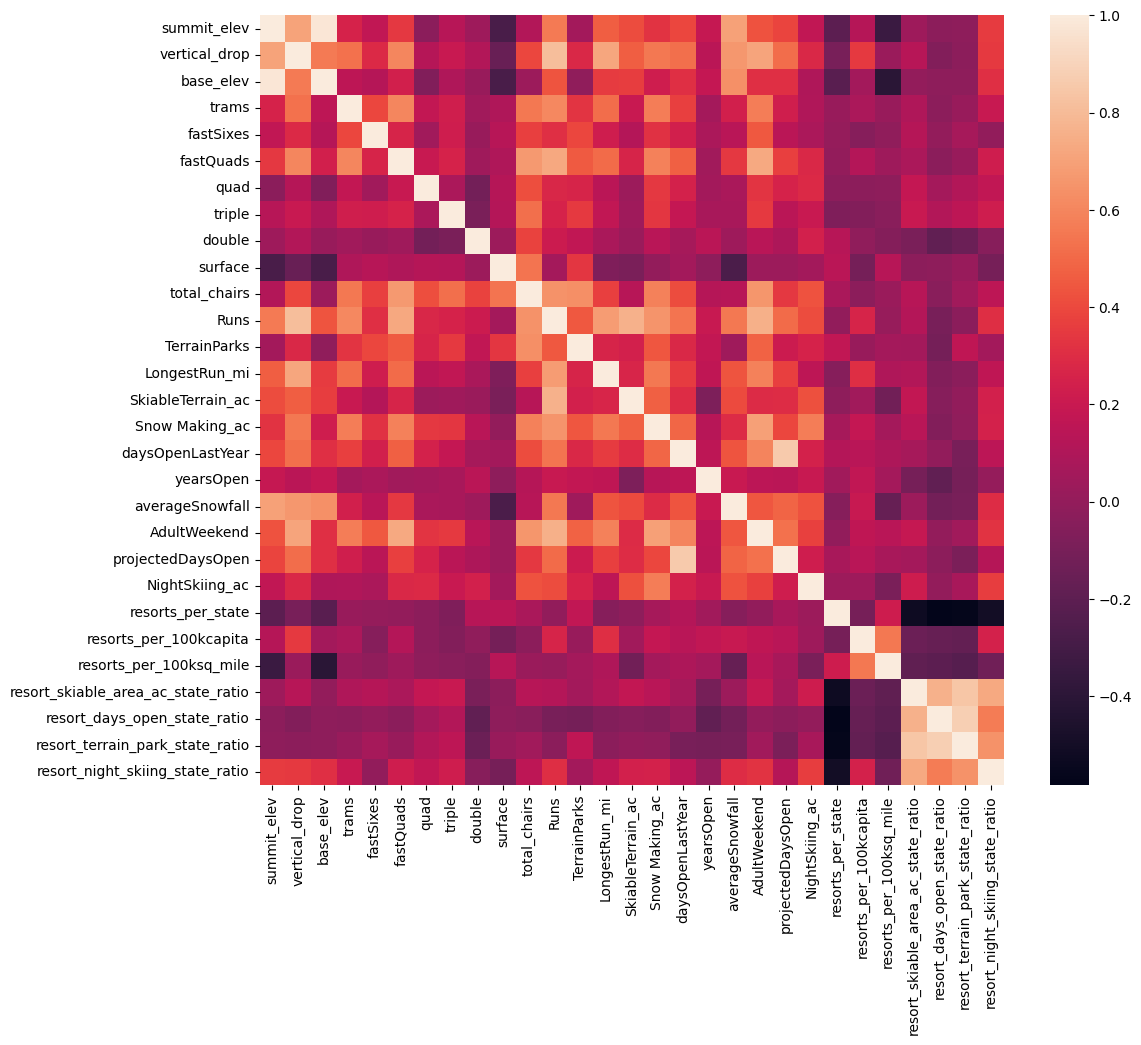

In [110]:
#Code task 12#
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(ski_data.corr());

There is a lot to take away from this. First, summit and base elevation are quite highly correlated. This isn't a surprise. You can also see that you've introduced a lot of multicollinearity with your new ratio features; they are negatively correlated with the number of resorts in each state. This latter observation makes sense! If you increase the number of resorts in a state, the share of all the other state features will drop for each. An interesting observation in this region of the heatmap is that there is some positive correlation between the ratio of night skiing area with the number of resorts per capita. In other words, it seems that when resorts are more densely located with population, more night skiing is provided.

Turning your attention to your target feature, `AdultWeekend` ticket price, you see quite a few reasonable correlations. `fastQuads` stands out, along with `Runs` and `Snow Making_ac`. The last one is interesting. Visitors would seem to value more guaranteed snow, which would cost in terms of snow making equipment, which would drive prices and costs up. Of the new features, `resort_night_skiing_state_ratio` seems the most correlated with ticket price. If this is true, then perhaps seizing a greater share of night skiing capacity is positive for the price a resort can charge.

As well as `Runs`, `total_chairs` is quite well correlated with ticket price. This is plausible; the more runs you have, the more chairs you'd need to ferry people to them! Interestingly, they may count for more than the total skiable terrain area. For sure, the total skiable terrain area is not as useful as the area with snow making. People seem to put more value in guaranteed snow cover rather than more variable terrain area.

The vertical drop seems to be a selling point that raises ticket prices as well.

#### 3.5.5.3 Scatterplots of numeric features against ticket price<a id='3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price'></a>

Correlations, particularly viewing them together as a heatmap, can be a great first pass at identifying patterns. But correlation can mask relationships between two variables. You'll now create a series of scatterplots to really dive into how ticket price varies with other numeric features.

In [111]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [112]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [x for x in ski_data.columns if x not in ['Name', 'Region', 'state', 'AdultWeekend']]

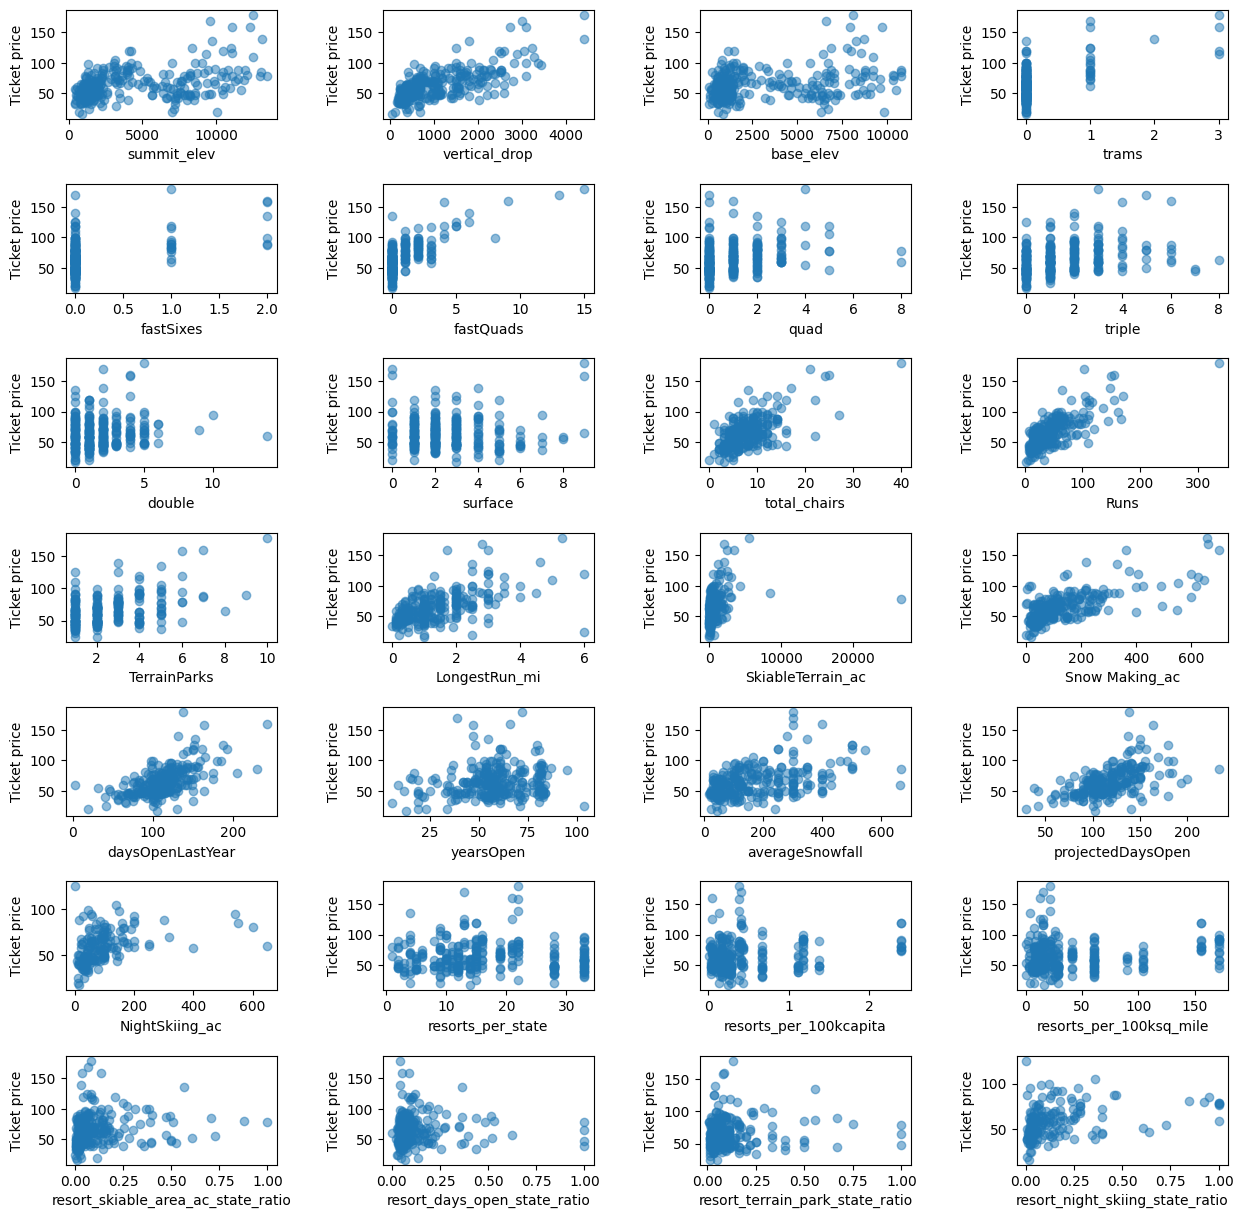

In [113]:
# create scatterplots using the `scatterplots` function and the newly defined `features` list
scatterplots(features, ncol=4, figsize=(15, 15))

In the scatterplots you see what some of the high correlations were clearly picking up on. There's a strong positive correlation with `vertical_drop`. `fastQuads` seems very useful. `Runs` and `total_chairs` appear quite similar and also useful. `resorts_per_100kcapita` shows something interesting that you don't see from just a headline correlation figure. When the value is low, there is quite a variability in ticket price, although it's capable of going quite high. Ticket price may drop a little before then climbing upwards as the number of resorts per capita increases. Ticket price could climb with the number of resorts serving a population because it indicates a popular area for skiing with plenty of demand. The lower ticket price when fewer resorts serve a population may similarly be because it's a less popular state for skiing. The high price for some resorts when resorts are rare (relative to the population size) may indicate areas where a small number of resorts can benefit from a monopoly effect. It's not a clear picture, although we have some interesting signs.

Finally, think of some further features that may be useful in that they relate to how easily a resort can transport people around. You have the numbers of various chairs, and the number of runs, but you don't have the ratio of chairs to runs. It seems logical that this ratio would inform you how easily, and so quickly, people could get to their next ski slope! Create these features now.

In [114]:
## create new ratio columns
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

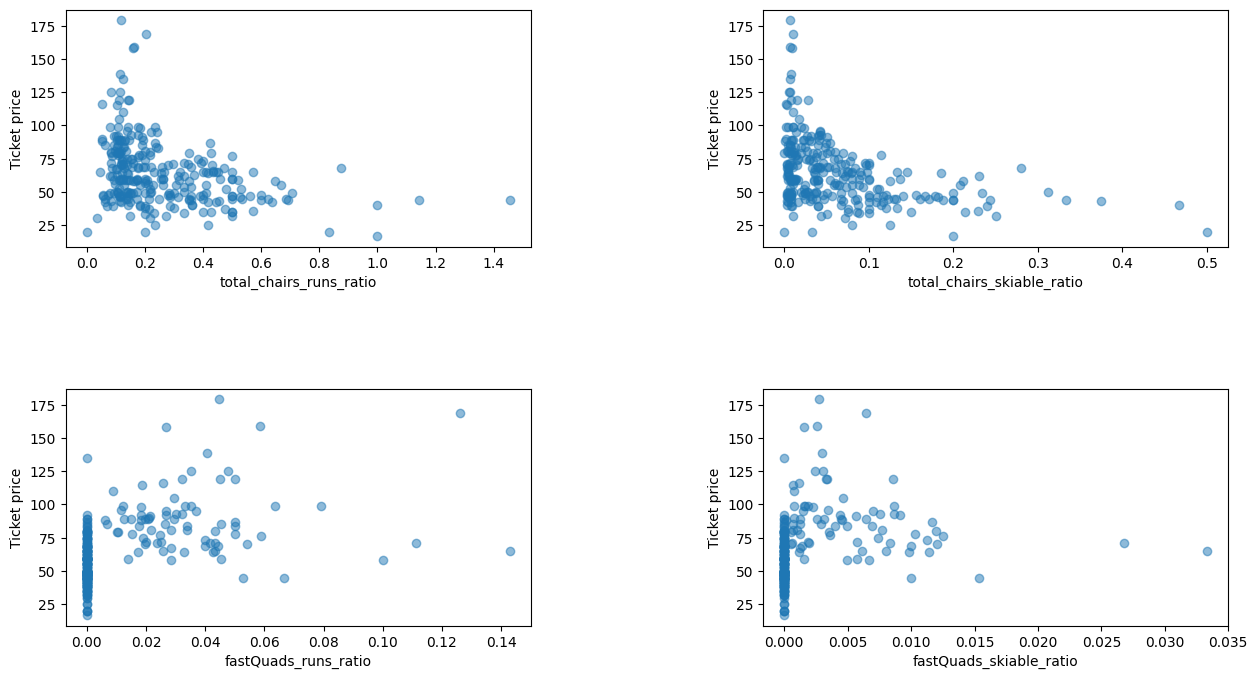

In [115]:
# create scatterplots with new ratio columns
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio',
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

At first these relationships are quite counterintuitive. It seems that the more chairs a resort has to move people around, relative to the number of runs, ticket price rapidly plummets and stays low. What we may be seeing here is an exclusive vs. mass market resort effect; if you don't have so many chairs, you can charge more for your tickets, although with fewer chairs you're inevitably going to be able to serve fewer visitors. Your price per visitor is high but your number of visitors may be low. Something very useful that's missing from the data is the number of visitors per year.

It also appears that having no fast quads may limit the ticket price, but if your resort covers a wide area then getting a small number of fast quads may be beneficial to ticket price.

## 3.6 Summary<a id='3.6_Summary'></a>

**Q: 1** Write a summary of the exploratory data analysis above. What numerical or categorical features were in the data? Was there any pattern suggested of a relationship between state and ticket price? What did this lead us to decide regarding which features to use in subsequent modeling? What aspects of the data (e.g. relationships between features) should you remain wary of when you come to perform feature selection for modeling? Two key points that must be addressed are the choice of target feature for your modelling and how, if at all, you're going to handle the states labels in the data.

**A: 1** Your answer here

* This exploratory data analysis (EDA) was the continuation of the previous notebook where most of the data was cleaned and condensed down to 277 rows and 25 columns in a dataset titled `ski_data_cleaned`. The target variable for this Data Science project and this notebook EDA is `AdultWeekend` which is the price of a weekend lift ticket at each of the ski resort.

* The other dataset that resulted from the previous notebook was `state_summary` which consists of 35 rows and 8 columns. This was a summary of important variables for each state that we want to consider for our predictive modeling of ticket prices.

* **What numerical or categorical features were in the data?**
    1. Categorical features in `state_summary`: `state`
    2. Categorical features in `ski_data_cleaned`, `Name`, `Region`, `state`
    3. Numeric features in `ski_data_cleaned` - a total of 22 numeric features, I won’t list them all.
    4. Numeric features in `state_summary`:
      * `state_area_sq_miles` - square mileage of each state
      * `state_population` - total population of each state
      * `resorts_per_state` - total number of resorts per state
      * `total_skiable_area_ac` - total skiable acres per state
      * `total_nightskiing_ac` - total night skiing acreage per state
      * `state_total_days_open` - total days resorts were open per state
      * `state_total_nightskiing_ac` - total ski areas with night skiing

* For the EDA process I created 2 numeric variables `resorts_per_100k_capita` and `resorts_per_100ksq_mile`. This revealed some interesting findings.
	  * Vermont has the most resports per 100k capita population. We also have to remember that the poplation of Vermont is ~645,000 people with most people settled around the city of Burlington in the north. The entire state is also encompassed by the Green Mountains which run from the southern border all the way to Canada and there are ski resorts scattered throughout the entire state. So it makes sense that Vermont with a smaller population has the highest ratio of ski resports per 100k people.
    * Montana the state where Big Mountain Resort is located is ranked 4th here.


* Vermont seems particularly high in terms of resorts per capita, and both New Hampshire and Vermont top the chart for resorts per area. New York doesn't appear in either! As I mentioned in my observations above, it again makes sense why Vermont is in the top 2 for number of resorts per square mile and based on 100k population.

* Another thing worth noting here is that the top 5 states represent 5 of the 6 states of the New England Region. These states all have lower square mileage than the western states like Colorado or Montana so it makes sense that they are the top 5 in terms of number of resorts per 100k square miles.

* Another observation? I printed the top 10 of the data above and we can see 9 of the 10 are in the northeast with 1 state (Michigan) being the most eastern of the midwest.

* A final observation regarding the square mileage findings is that the top 10 are all densely populated states so the number of resorts per square mile would likely be located closer together than western resorts.


* **Was there any pattern suggested of a relationship between state and ticket price?**
    * Before performing principal component analysis (PCA) to reduce dimensionality of the data, I looked at the average weekend ticket prices. Colorado had the highest average ticket price with Arizona, California, Nevada, and New Jersey rounding out the top 5. Montana, the state where Big Mountain is located, was 15th overall.
    * After performing PCA and scatter plots, correlations between state and ticket price were seen:
        * Strong positive correlation with `vertical_drop.`,fastQuads`, `Runs` and `total_chairs`. This does seem to correlate with the most expensive states that were also most popular for skiing: Utah, Colorado, Vermont, California.
    * `resorts_per_100kcapita` revealed something interesting. When the value is low, there is significant variability in ticket price, although it can go much higher. Ticket prices may drop a little before then climbing upwards as the number of resorts per capita increases. Ticket prices could climb with the number of resorts serving a population because it indicates a popular area for skiing with plenty of demand - this is easily understood when we see the top 3 resorts in this aggregation are: Utah, Colorado and Vermont.
  * Lower ticket prices were seen when a smaller number of resorts served a population because it was a less popular state for skiing, these were all midwest states (Iowa, Illinois, Ohio, Missouri). I was able to see this by doing a groupby on ‘state’ and aggregating on ‘resorts_per_100kcapita’ and ‘AdultWeekend’.
  * The higher price for some resorts when ski resorts are not common in the respective state location (relative to the population size) may indicate areas where a small number of resorts can benefit from a monopoly effect. It's not a clear picture, although we have some interesting signs.


* **What did this lead us to decide regarding which features to use in subsequent modeling?**
This led us to look more closely at the correlation between `AdultWeekend`, `ticket prices` and `total_chairs`, `fastQuads`, `Runs`, and `Skiable terrain` by state. It seems the more chairlifts a resort has, relative to the number of runs, ticket price rapidly drops and stays low. It also appears that having no fast quads may limit the ticket price, but if your resort covers a wide area then getting a small number of fast quads may benefit the ticket price.


* **What aspects of the data (e.g. relationships between features) should you remain wary of when you come to perform feature selection for modeling?**
  * This may be “an exclusive vs. mass market resort effect”; if you don't have a lot of chairs, you can charge more for your tickets, although with fewer chairs you're going to be able to serve fewer skiers. Your price per visitor is high but your number of visitors may be low.

  * Some of the features we created for modeling, mainly the ratios of different variables we should be wary of. Even though we were able to scale our features using PCA, this still may not reflect an even scale for comparison of certain features to one another.
  * Some very important information that is missing from the data is the number of visitors per year per resort in each state. We also don’t know what the lift system is that our resort Big Mountain installed - was it a fastQuad? Was it a Tram or a Gondola?
  * We should also be wary that we are ONLY analyzing weekend ticket prices. What if there is a relationship between weekday prices and weekend prices? While weekday prices usually average less than weekend prices, we should still be wary of this missing variable. What about holiday prices those aren’t included either, we know that holidays is when lift ticket prices tend to skyrocket for all resorts.
  * We also do not have any customer demographic data for these resorts. Are the customers local vs. regional vs. national or international? If more customers drive vs. fly to your resort this will affect ticket prices. Also, what about data on customers that are ski/snowboard 1 day vs. multiple days in a row? A skier/boarder may buy a multi-day lift ticket due to a discounted price and they may be staying on-site in a hotel. It would be helpful to have this data as well.
  * One final thing that we should be wary of - operational expense data is missing. The only thing close to operational we have in our data is the different types of chairlifts each resort has and the snowmaking acreage. Do we assume that if a resort has more chairlifts and more snowmaking acreage to cover that their operational expenses will be higher and thus correlate with higher lift ticket prices? All factors to consider since the ultimate goal of this project is to help Big Mountain Resort reduce their operational expenses to help pay for this new 1.5 million dollar lift.

* **Two key points that must be addressed are the choice of target feature for your modeling and how, if at all, you're going to handle the states labels in the data?**
  * The target feature we know for now is `AdultWeekend` which is the weekend ticket prices. We elected in the first notebook not to use `AdultWeekday` ticket prices. However, it may be worth considering both as we go further in the process. It would be helpful if we had the specific days of the week for this data.
  * As for the state labels in the data? I do not think it will be too much trouble as long as we maintain the index of our data associated with each state. I also wonder if we may need to bring the Region variable back into our data?
  * We may consider creating a new Region variable based on the clusters that arise in the data. For example, we saw in our EDA that the top 5 states represent 5 of the 6 states of the New England Region. These states all have lower square mileage than the western states like Colorado or Montana so it makes sense that they are the top 5 in terms of number of resorts per 100k square miles. We also saw that Utah and Colorado are starting to emerge as the most expensive resorts. Do we classify them as ‘Western Region’ resorts? Or do we classify Utah as its own “Region” because it is the Wasatch mountain range and Colorado is the rockies? Since our resort Big Mountain is also part of the Rocky Mountain range, do we aim to classify it in the same region as Colorado?
  * The National Ski Areas Association classifies resorts by region base on this resource below, do we want to stay with the industry standard for this? https://nsaa.org/webdocs/Media_Public/IndustryStats/NSAA_Resort_Regions.jpg
    * Northeast
    * Southeast
    * Midwest
    * Rocky Mountain
    * Pacific Southwest
    * Pacific Northwest

  * One last thought going forward is how to approach price prediction? There is one resource that uses a “Weight Methodology” for scaling ticket prices. This is based on multiple factors and differs based on location, day of week and time of year. Is this approach worth considering?


  * We should also consider that some resorts while listed as individual areas, may be part of a larger conglomerate of resorts. For example, in Colorado, the mountains ‘Snowmass’, ‘Aspen Highlands’, ‘Aspen Mountain’, and ‘Buttermilk’ are all part of Aspen Resort and on the same lift ticket but they are often considered independent in pricing analysis. We also have to consider the fact that Vail resorts own a good number of resorts and they price their resorts based on their own pricing scale as customers can ski multiple Vail resorts on the same ticket. We also know that Vail owned resorts have the highest prices in the ski industry and usually attract more customers of a higher economic class. This information is worth considering as we go forward. I assume “Big Mountain” Ski Resort is an independent resort and so we should make sure to compare it to other resorts in the same class with the same customer base.



#### References

  * Butler, 2023. "Vail Resorts Inc. - Valuation and Comprehensive Analysis". Retrieved from: https://cedar.wwu.edu/cgi/viewcontent.cgi?article=1725&context=wwu_honors
  * Peakrankings, 2024. "Weight Methodology". Retrieved from: https://www.peakrankings.com/lift-ticket-pricing-guide#appendix
  * Peakslopecontent, 2022. "Key Trends in Ski Resort Lift Ticket Pricing". Retrieved from: https://www.newschoolers.com/news/read/Key-Trends-Ski-Resort-Lift-Ticket-Pricing
  * Weintraub, 2024. "Have the Epic and Ikon Passes “Ruined” Skiing? An Honest Look". Retrieved from: https://www.peakrankings.com/content/have-epic-and-ikon-ruined-skiing-an-honest-look



# Appendix
* Additional Code Evaluations for summary and analysis.

In [116]:
# looking closer at resorts_per_100kcapital compared to AdultWeekend ticket prices
ski_data.groupby('state')['resorts_per_100kcapita','AdultWeekend'].agg('mean').sort_values(by='AdultWeekend',ascending=False)

<ipython-input-116-9597cbb75a5b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ski_data.groupby('state')['resorts_per_100kcapita','AdultWeekend'].agg('mean').sort_values(by='AdultWeekend',ascending=False)


,resorts_per_100kcapita,AdultWeekend
state,,
Utah,0.405495,93.000000
Colorado,0.382028,90.714286
Vermont,2.403889,87.900000
Arizona,0.027477,83.500000
California,0.053148,81.416667
Nevada,0.129864,81.000000
New Jersey,0.022517,79.990000
West Virginia,0.223196,79.750000
Maryland,0.016541,79.000000


In [117]:
# looking closer at some of the highly correlated variables with AdultWeekend ticket prices grouped by state
ski_data.groupby('state')['vertical_drop','fastQuads','Runs','total_chairs','AdultWeekend'].agg('mean').sort_values(by='AdultWeekend',ascending=False)


<ipython-input-117-1416f17010a5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ski_data.groupby('state')['vertical_drop','fastQuads','Runs','total_chairs','AdultWeekend'].agg('mean').sort_values(by='AdultWeekend',ascending=False)


,vertical_drop,fastQuads,Runs,total_chairs,AdultWeekend
state,,,,,
Utah,2183.083333,2.750000,86.333333,8.666667,93.000000
Colorado,2177.928571,2.500000,105.000000,10.785714,90.714286
Vermont,1957.900000,1.600000,72.400000,9.200000,87.900000
Arizona,2050.000000,0.500000,60.000000,7.500000,83.500000
California,1388.083333,1.333333,50.833333,9.666667,81.416667
Nevada,1300.000000,0.250000,32.250000,5.000000,81.000000
New Jersey,1040.000000,2.000000,46.000000,10.000000,79.990000
West Virginia,988.250000,0.750000,43.500000,7.750000,79.750000
Maryland,700.000000,0.000000,34.000000,12.000000,79.000000


In [118]:
# Save the data
# datapath = '../data'
# save_file(ski_data, 'ski_data_step3_features.csv', datapath)


### I am going to do this differently since I am using google colab
#datapath = '/content/drive/MyDrive/Springboard_Data_Science/Big_Mountain_Case_Study'

# Save the file
#ski_data.to_csv(f'{datapath}/ski_data_step3_features.csv',index=False)